In [1]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [20]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
sys.path.insert(1, '../libs')
from scatter_hull import ScatterHull

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from scipy.interpolate import interp1d

In [11]:
header = ['volcano', 'cluster']

In [12]:
sh = ScatterHull()
all_volcanoes = sh.get_all_volcanoes()

In [13]:
all_volcanoes

['Aguilera',
 'Antillanca-Casablanca',
 'Apagado',
 'Caburga-Huelemolle',
 'Calbuco',
 'Carrán-Los Venados',
 'Cay',
 'Chaitén',
 'Corcovado',
 'Cordón Cabrera',
 'Hornopirén',
 'Huanquihue Group',
 'Hudson',
 'Huequi',
 'Lanín',
 'Lautaro',
 'Llaima',
 'Macá',
 'Melimoyu',
 'Mentolat',
 'Michinmahuida',
 'Mocho-Choshuenco',
 'Monte Burney',
 'Osorno',
 'Puyehue-Cordón Caulle',
 'Quetrupillán',
 'Reclus',
 'Sollipulli',
 'Subsidiary Vcha dome',
 'Villarrica',
 'Yanteles',
 'Yate']

In [14]:
simbología = pd.read_excel('../data/Simbologia.xlsx')
def get_volcano_color(volcano):    
    Event = simbología.loc[simbología['Volcano'] == volcano]
    color = Event.values[0,2]
    return color

In [15]:
n_clusters = {}
n_clusters['Aguilera'] = 2
n_clusters['Antillanca-Casablanca'] =3
n_clusters['Apagado'] = 2
n_clusters['Caburga-Huelemolle'] = 1
n_clusters['Calbuco'] = 2
n_clusters['Carrán-Los Venados'] = 2
n_clusters['Cay'] = 3
n_clusters['Chaitén'] = 1
n_clusters['Corcovado'] = 0
n_clusters['Cordón Cabrera'] = 0
n_clusters['Hornopirén'] = 3
n_clusters['Huanquihue Group'] = 1
n_clusters['Hudson'] = 1
n_clusters['Huequi'] = 3
n_clusters['Lanín'] = 3
n_clusters['Lautaro'] = 2
n_clusters['Llaima'] = 1
n_clusters['Macá'] = 3 
n_clusters['Melimoyu'] = 3
n_clusters['Mentolat'] = 2
n_clusters['Michinmahuida'] = 1
n_clusters['Mocho-Choshuenco'] = 1
n_clusters['Monte Burney'] = 3
n_clusters['Osorno'] = 2
n_clusters['Puyehue-Cordón Caulle'] = 2
n_clusters['Quetrupillán'] = 2
n_clusters['Reclus'] = 2
n_clusters['Sollipulli'] = 2
n_clusters['Subsidiary Vcha dome'] = 3
n_clusters['Villarrica'] = 3
n_clusters['Yanteles'] = 1
n_clusters['Yate'] = 1

In [30]:
# to normalize sample points 
clusterLens = []
for v in all_volcanoes:
    points = sh.get_points_per_volcano(v, 'SiO2','K2O')
    if len(points) < 5:
        clusterLens.append(len(points))
    else:
        # DBSCAN
        clusters = sh.get_clusters_dbscan(points, eps=1, algorithm='auto')
        for c_label, c_points in clusters.items():
            clusterLens.append(len(c_points))

print(clusterLens)
m = interp1d([min(clusterLens),max(clusterLens)],[0,1])
print(m(19))


[28, 4, 33, 71, 8, 4, 25, 5, 2, 134, 9, 125, 8, 8, 19, 6, 28, 76, 18, 7, 10, 982, 3, 4, 4, 19, 1, 173, 3, 739, 3, 6, 5, 59, 10, 6, 6, 23, 11, 4, 1411, 1, 6, 9, 157, 82, 101, 6, 6, 13, 12, 5, 7, 8, 363, 6, 2657, 2, 362, 8, 90, 6, 1552, 11, 10, 1090, 97, 5, 13, 120, 12, 64, 6, 21, 855, 4, 2, 13, 5, 11, 8]
0.00677710843373494


N points:  32


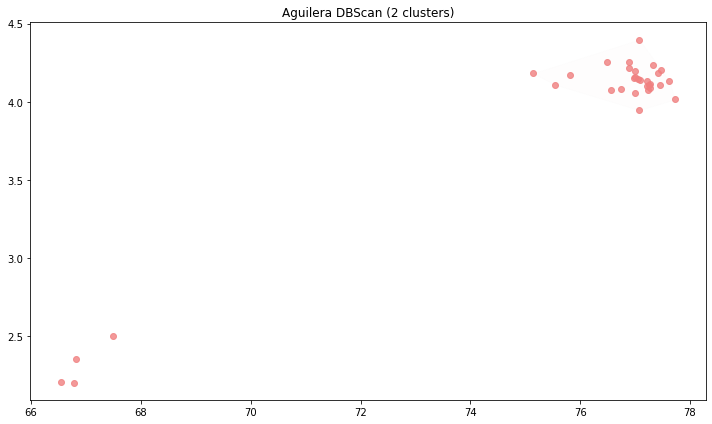

N points:  116


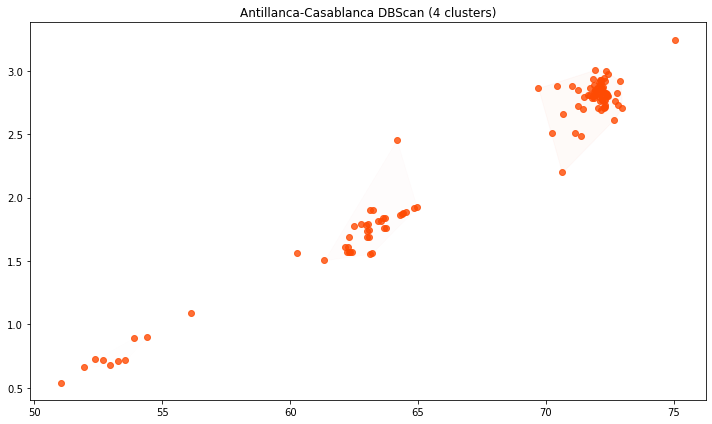

N points:  32


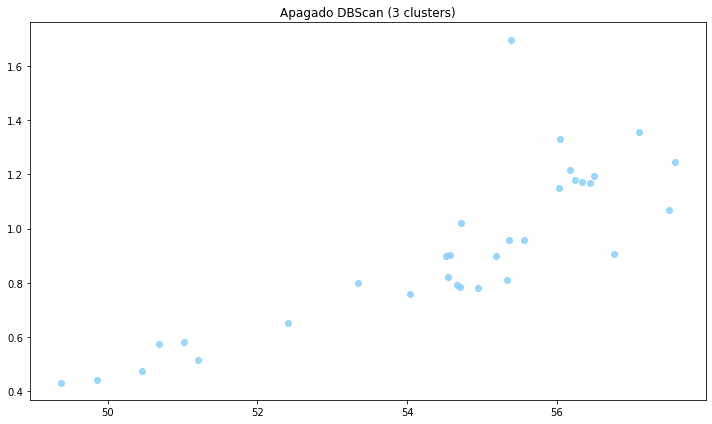

N points:  134


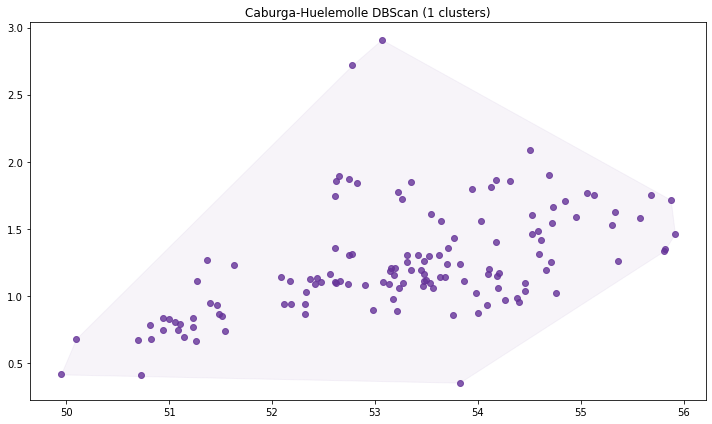

N points:  142


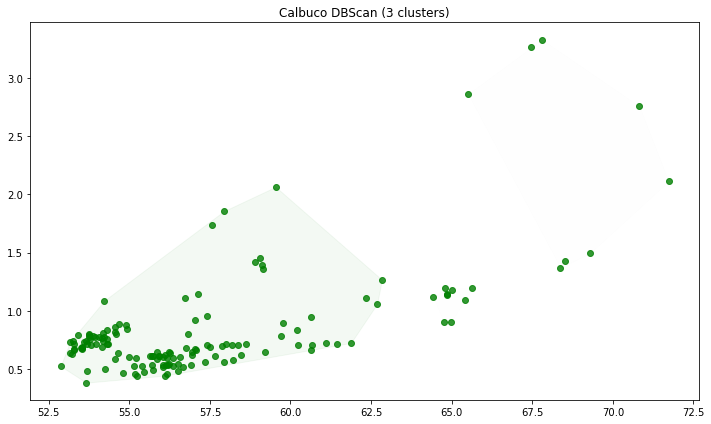

N points:  155


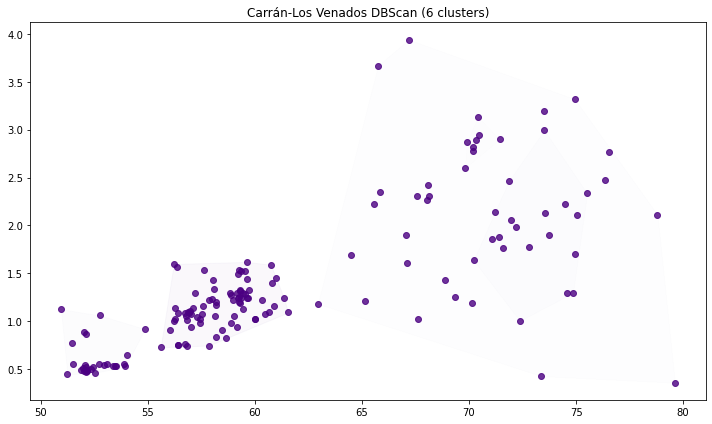

N points:  17


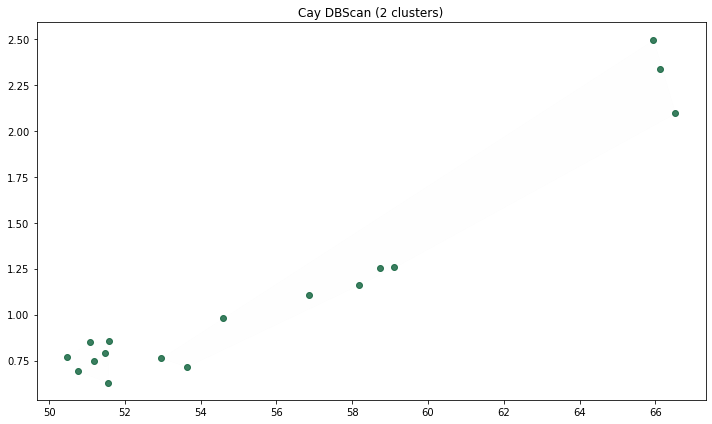

N points:  985


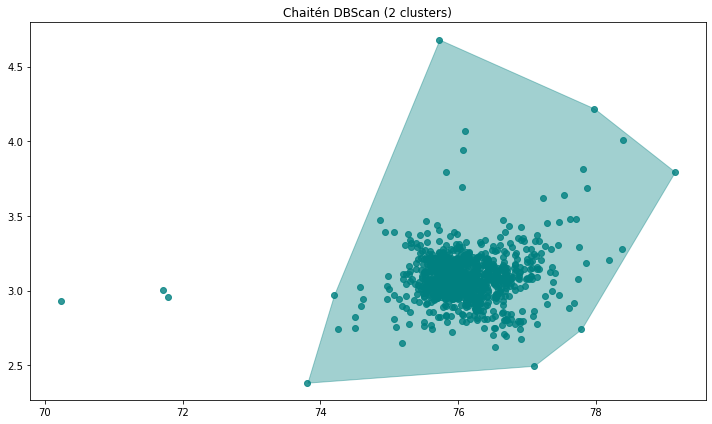

N points:  4


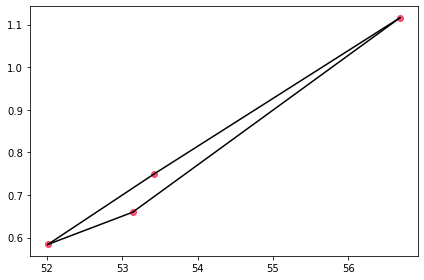

N points:  4


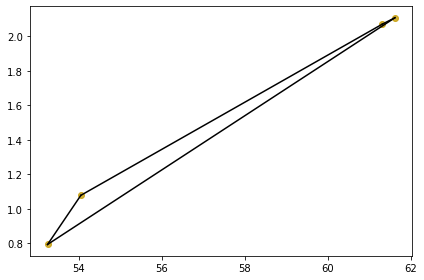

N points:  20


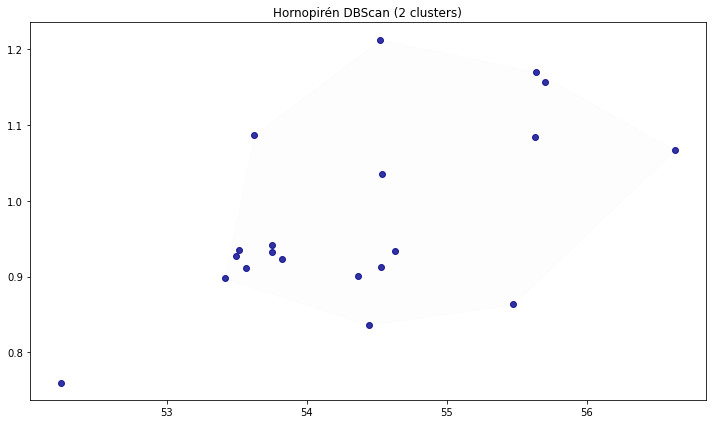

N points:  176


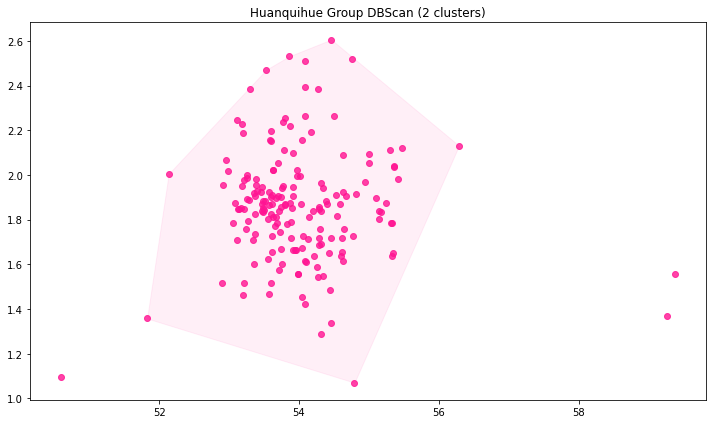

N points:  742


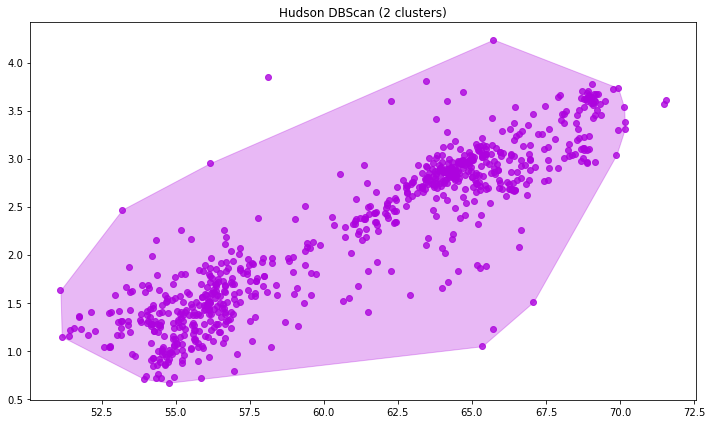

N points:  11


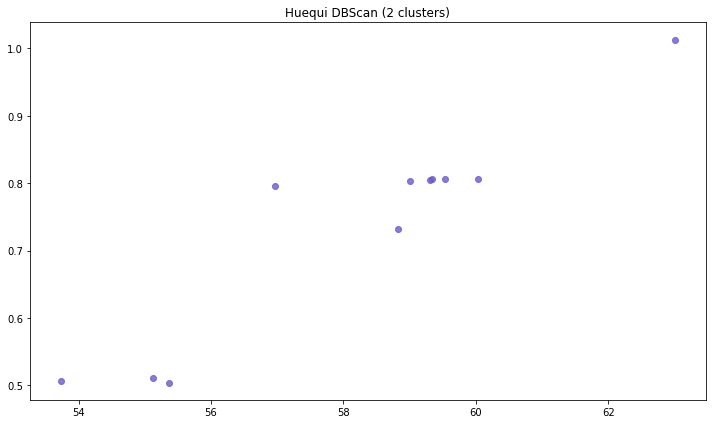

N points:  81


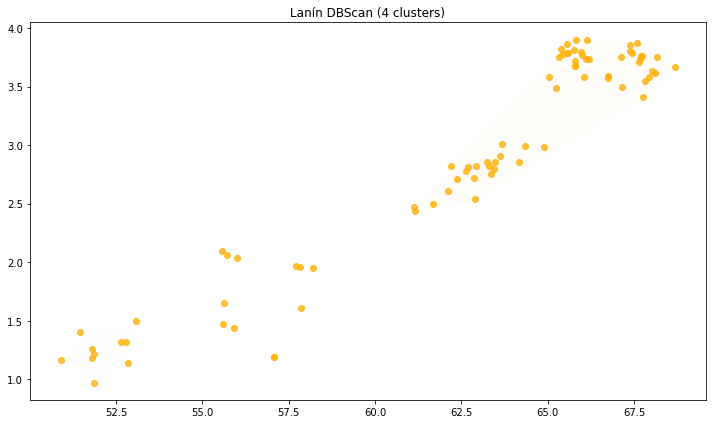

N points:  38


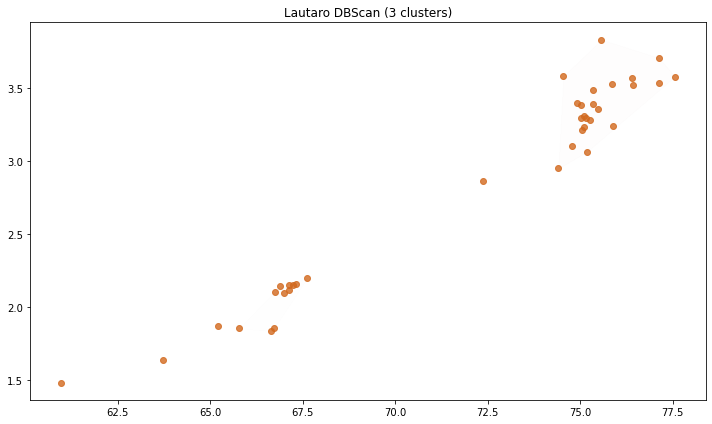

N points:  1412


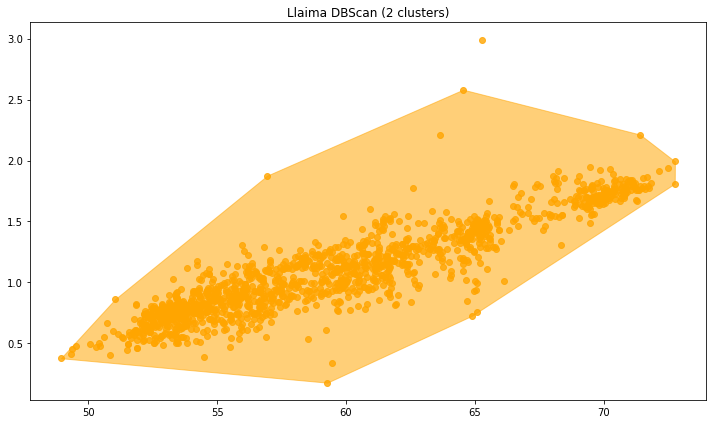

N points:  15


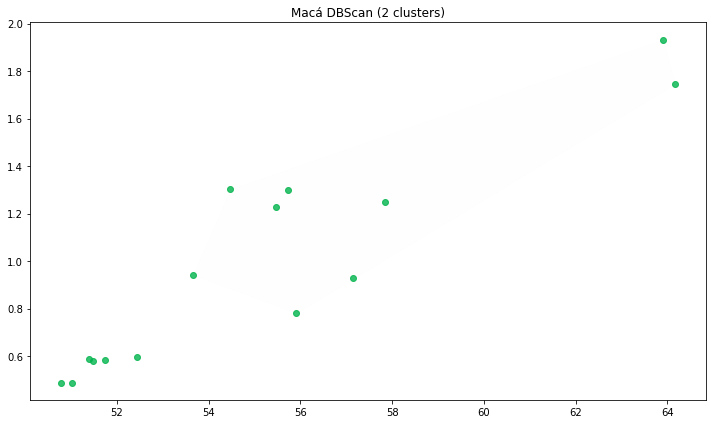

N points:  346


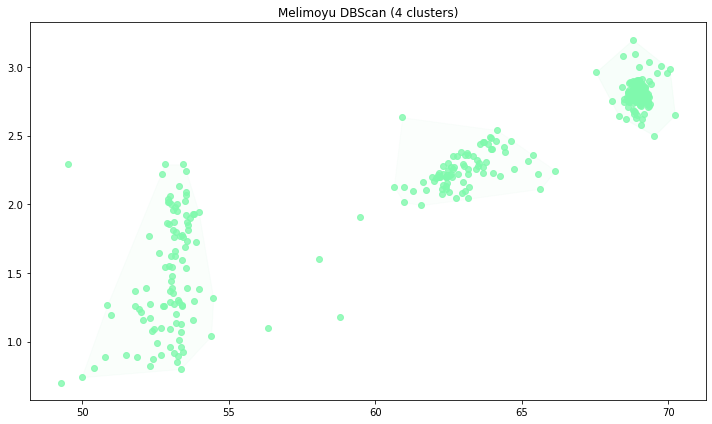

N points:  51


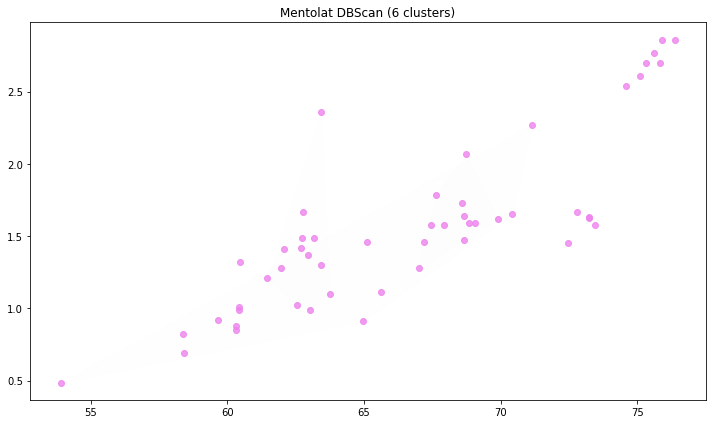

N points:  369


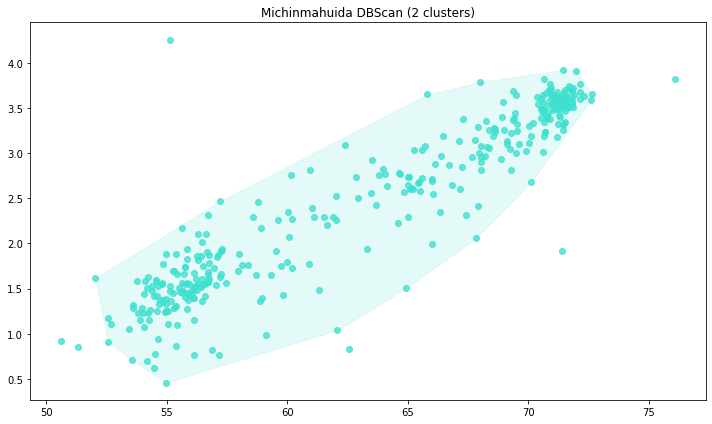

N points:  2659


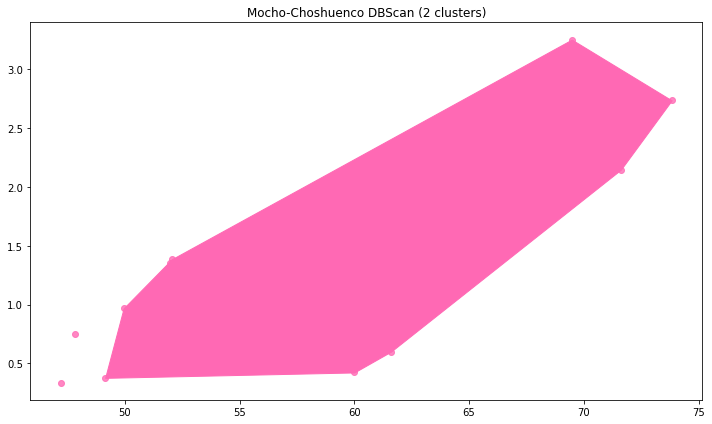

N points:  370


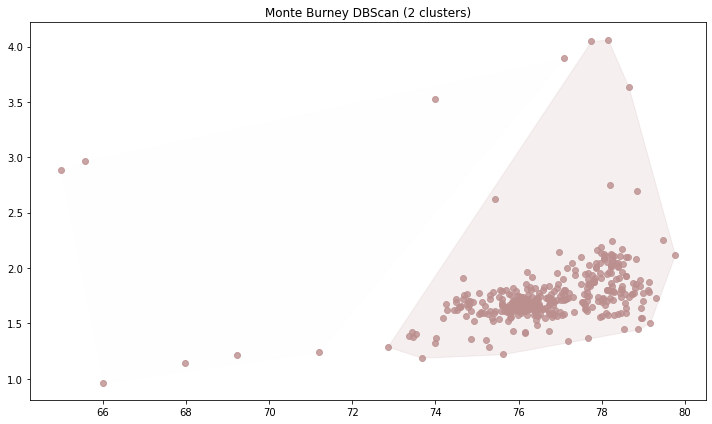

N points:  96


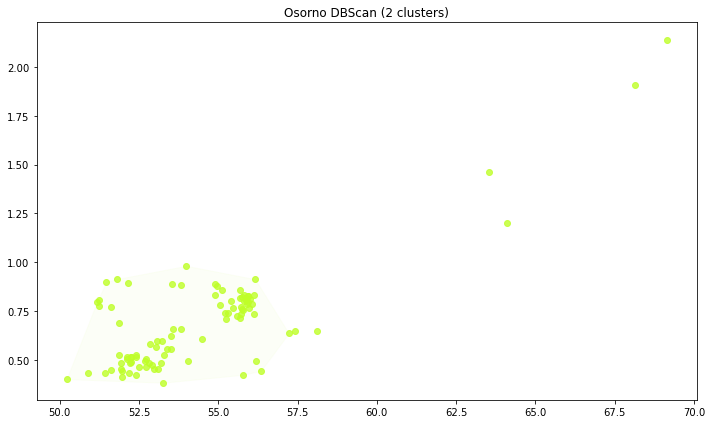

N points:  1573


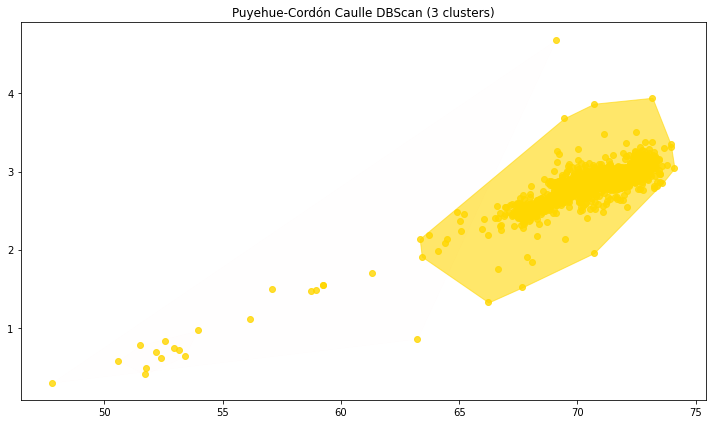

N points:  1205


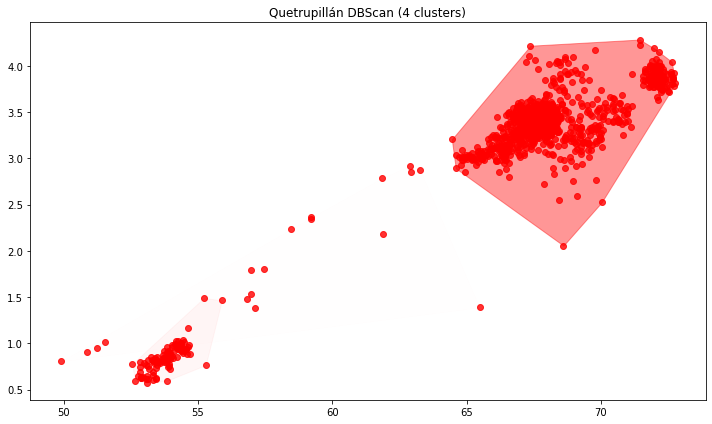

N points:  132


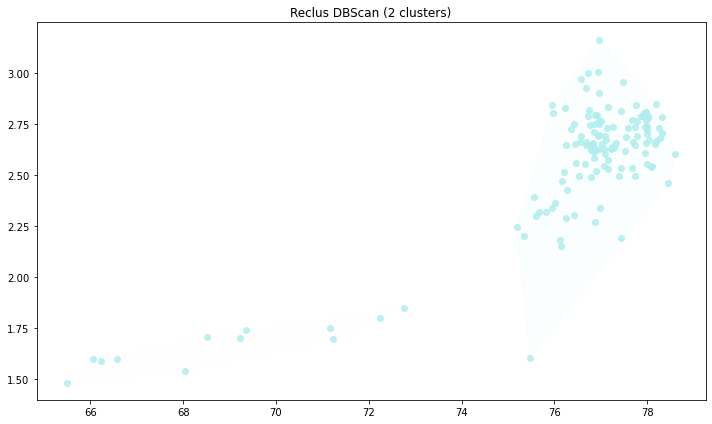

N points:  70


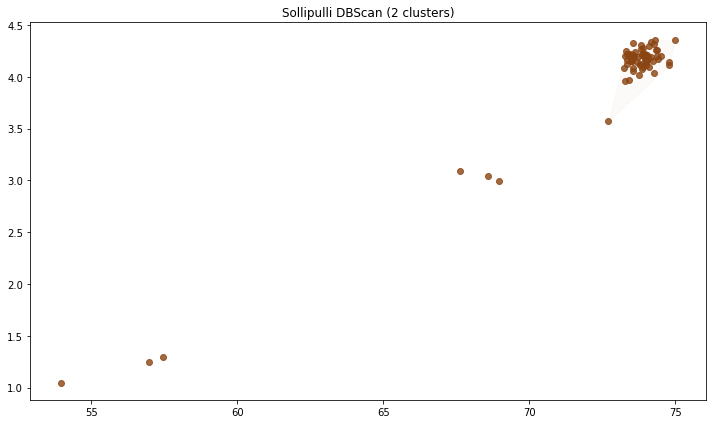

N points:  21


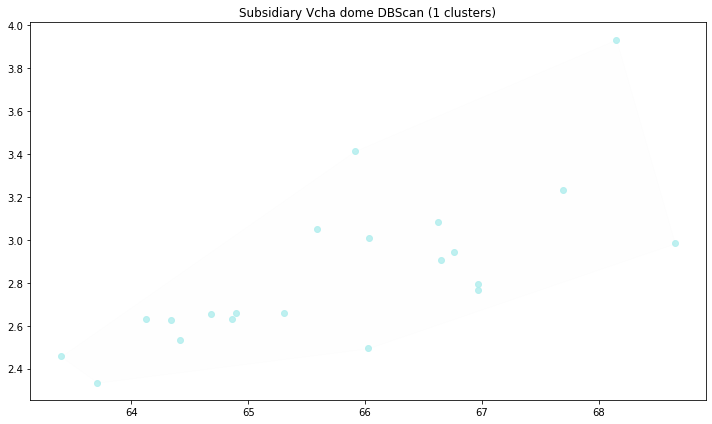

N points:  859


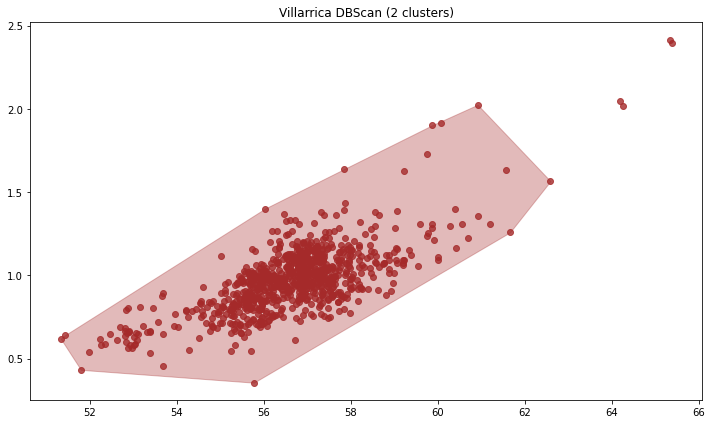

N points:  2


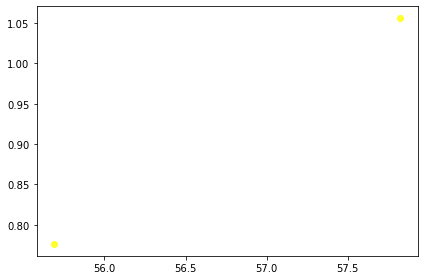

N points:  37


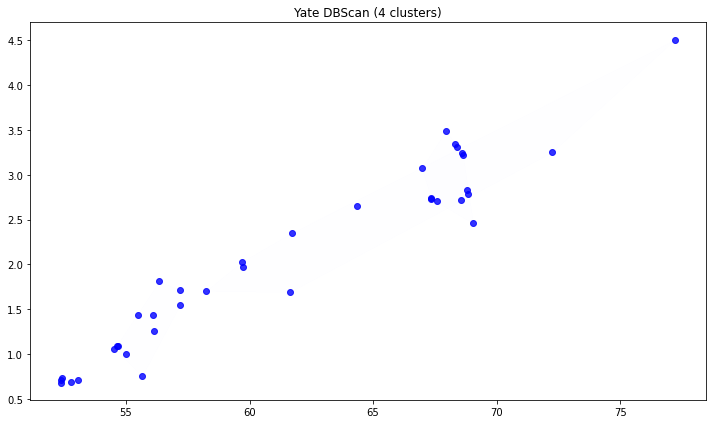

In [36]:
for v in all_volcanoes:
    points = sh.get_points_per_volcano(v, 'SiO2','K2O')
    n_clus = n_clusters[v]
    color = get_volcano_color(v)
    print('N points: ', len(points))
    if len(points) < 5:
        plt.scatter(points[:,0], points[:,1], color=color, alpha=.8)
        if len(points) > 2:
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

        # DBSCAN
        clusters = sh.get_clusters_dbscan(points, eps=1, algorithm='auto')
        title = v + ' DBScan (' + str(len(clusters.keys())) + ' clusters)'
        plt.title(title)
        for c_label, c_points in clusters.items():
            plt.scatter(c_points[:,0], c_points[:,1], color=color, alpha=.8)
            if len(c_points) > 2:
                hull = ConvexHull(c_points)

                vertexs = []
                for simplex in hull.vertices:
                    vertexs.append([c_points[simplex, 0], c_points[simplex, 1]])
                
                dens = np.float32(m(len(c_points)))
                
                patches = []
                r = vertexs
                polygon = Polygon(vertexs, True)
                patches.append(polygon)
                p = PatchCollection(patches, alpha=dens)
                p.set_color(color)
                axes.add_collection(p)
                
        
                    
    saveTitle = v + '.png'
    plt.savefig(saveTitle, transparent='True')
    
    plt.tight_layout()
    plt.show()


In [ ]:
# fill polygon : https://blog.csdn.net/qq_37025073/article/details/106821092

In [ ]:
# Polygon fill type :
# https://blog.csdn.net/weixin_32252271/article/details/118900402?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_baidulandingword~default-1-118900402-blog-106821092.pc_relevant_default&spm=1001.2101.3001.4242.2&utm_relevant_index=4